In [1]:
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import aggregator as ag
import monthly_modeler as mm

In [2]:
#data_file_name_review = "distributed_data_collection/databases/review_data_sample.csv"
#data_file_name_book = "distributed_data_collection/databases/book_data_sample.csv"

data_file_name_review = "distributed_data_collection/databases/review_data.csv"
data_file_name_book = "distributed_data_collection/databases/book_data.csv"

start_date = datetime.datetime(2018, 1, 1)
end_date = datetime.datetime(2020, 9, 30)

Before I start the model comparison, I want to take a quick peek at the overall correlations between various time periods. I just want a rough sense of the importance of historical data.

In [3]:
book_columns_history = ["num_reviews", "num_ratings"]

data_aggregator_history = ag.Aggregator(data_file_name_review, data_file_name_book, book_columns_history, start_date, end_date, "month")
data_history = data_aggregator_history.aggregate("by_book")

if "book_id" in data_history.columns:
    data_history.drop(columns = "book_id", inplace = True)
    
corr = data_history.corr()
#print(corr.describe())

Aggregator Initiated.
Processing Scraper Output...
Scraper Output Processed.
Aggregating Review Data...
Review Data Aggregated.
Merging Book Data...
Book Data Merged.


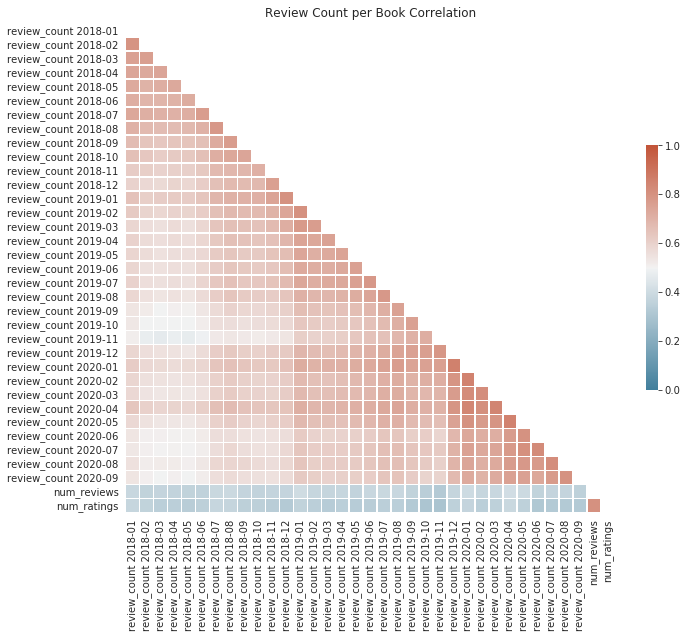

In [4]:
with sns.axes_style("white"):    
    mask = np.triu(np.ones_like(corr, dtype=bool))
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    plt.title("Review Count per Book Correlation")

    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0.5, vmin = 0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

Interesting that overall history, as measured by num_reviews num_ratings have the lowest correlations. Immediate history (ie, last month) seems to have strongest correlation.

The first test that I want to run: comparing baseline methodology (linear only) to methodology with multiple regressions (linear, ridge, lasso) and regularization parameters. There's absolutely no reason why the multiple regression types won't win, but never let it be said I don't validate my assumptions. This is going to be called "check01" with the different inputs referred to as "baseline" or "new_param."

In [5]:
alpha_list_baseline = [1]
regression_types_list_baseline = ["linear"]
is_log_options_baseline = [False, True] 

alpha_list_new_param = [np.log2(x) for x in range(2,11)] + [5, 10]
regression_types_list_new_param = ["linear", "ridge", "lasso"]
is_log_options_new_param = [False, True]

In this case, we only need one dataset, although we may eventually want to replicate this test multiple times. 

In [6]:
book_columns_check01 = ["num_reviews", "num_ratings", "avg_rating"]

data_aggregator_check01 = ag.Aggregator(data_file_name_review, data_file_name_book, book_columns_check01, start_date, end_date, "month")
data_aggregator_check01.aggregate("by_book")
data_aggregator_check01.sparsity_filter(2)

time_periods_post = data_aggregator_check01.get_annual_time_periods(2020)
data_train_check01, data_test_check01 = data_aggregator_check01.get_train_test_split(0.75)


Aggregator Initiated.
Processing Scraper Output...
Scraper Output Processed.
Aggregating Review Data...
Review Data Aggregated.
Merging Book Data...
Book Data Merged.
Dropped 0/37 columns. 37 columns remaining.


In [7]:
regression_processor_baseline = mm.Regression_Processor(data_train_check01, data_test_check01, time_periods_post, regression_types_list_baseline, is_log_options_baseline, alpha_list_baseline)
performance_df_baseline, model_dict_baseline = regression_processor_baseline.get_optimal_models()

print(performance_df_baseline.round(3))

10/18 models processed
18/18 models processed
  post_period regression_type is_log alpha  mse_test  r2_train  r2_test
0     2020-01          linear  False  None     3.045     0.826    0.753
1     2020-02          linear  False  None     1.743     0.723    0.658
2     2020-03          linear  False  None     2.049     0.705    0.616
3     2020-04          linear  False  None     2.807     0.749    0.699
4     2020-05          linear  False  None     4.166     0.670    0.623
5     2020-06          linear  False  None     4.401     0.564    0.510
6     2020-07          linear  False  None     3.418     0.588    0.563
7     2020-08          linear  False  None     1.951     0.577    0.600
8     2020-09          linear  False  None     1.810     0.544    0.573


In [8]:
regression_processor_new_param = mm.Regression_Processor(data_train_check01, data_test_check01, time_periods_post, regression_types_list_new_param, is_log_options_new_param, alpha_list_new_param)
performance_df_new_param, model_dict_new_param = regression_processor_new_param.get_optimal_models()

print(performance_df_new_param.round(3))

10/414 models processed
20/414 models processed
30/414 models processed
40/414 models processed
50/414 models processed
60/414 models processed
70/414 models processed
80/414 models processed
90/414 models processed
100/414 models processed
110/414 models processed
120/414 models processed
130/414 models processed
140/414 models processed
150/414 models processed
160/414 models processed
170/414 models processed
180/414 models processed
190/414 models processed
200/414 models processed
210/414 models processed
220/414 models processed
230/414 models processed
240/414 models processed
250/414 models processed
260/414 models processed
270/414 models processed
280/414 models processed
290/414 models processed
300/414 models processed
310/414 models processed
320/414 models processed
330/414 models processed
340/414 models processed
350/414 models processed
360/414 models processed
370/414 models processed
380/414 models processed
390/414 models processed
400/414 models processed
410/414 m